<a href="https://colab.research.google.com/github/baharbrl/Vehicle_fuel_consumption/blob/main/Vehicle_fuel_consumption2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update #depolama alanı güncelleme

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa.launchpad.net/graphics-drive

In [ ]:
%pwd #adres öğrenme

'/content'

In [ ]:
!pip install -q keras

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import keras
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#feature isimleri
column_name = ["MPG", "Cylinders", "Displacement","Horsepower","Weight","Acceleration","Model Year", "Origin"]

In [ ]:
#nonvalue=? alalım boşluk kısmını true yapalım atlayalım
data = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/vehicle_fuel_consumption_analysis/auto-mpg.data", names = column_name, na_values = "?", comment = "\t",sep = " ", skipinitialspace = True)
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [ ]:
#bagımlı degisken ismini target yap
data = data.rename(columns = {"MPG":"target"})

In [ ]:
print(data.head())
print("Data shape: ",data.shape)

   target  Cylinders  Displacement  ...  Acceleration  Model Year  Origin
0    18.0          8         307.0  ...          12.0          70       1
1    15.0          8         350.0  ...          11.5          70       1
2    18.0          8         318.0  ...          11.0          70       1
3    16.0          8         304.0  ...          12.0          70       1
4    17.0          8         302.0  ...          10.5          70       1

[5 rows x 8 columns]
Data shape:  (398, 8)


In [ ]:
data.info() #motor gucunde 6 missing value var

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   target        398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [ ]:
data.describe()

,target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
#missing value
print(data.isna().sum())

target          0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


In [ ]:
#missing valueları Horsepower meanle doldur
data["Horsepower"] = data["Horsepower"].fillna(data["Horsepower"].mean())
print(data.isna().sum())

target          0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


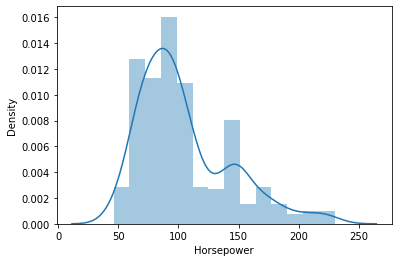

In [ ]:
sns.distplot(data.Horsepower)

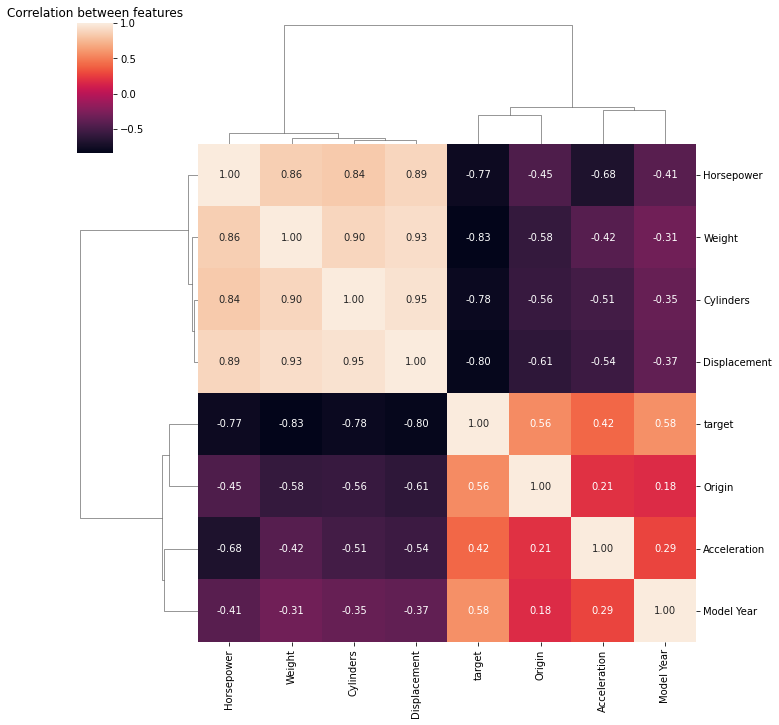

In [ ]:
#eda
corr_matrix = data.corr() #featurelar arası corelasyona baktım
sns.clustermap(corr_matrix, annot= True, fmt=".2f")
plt.title("Correlation between features")
plt.show()

In [ ]:
#corr matrisi kucultmek icin filtre
treshold = 0.75
filtre = np.abs(corr_matrix["target"])>treshold
corr_features = corr_matrix.columns[filtre].tolist()

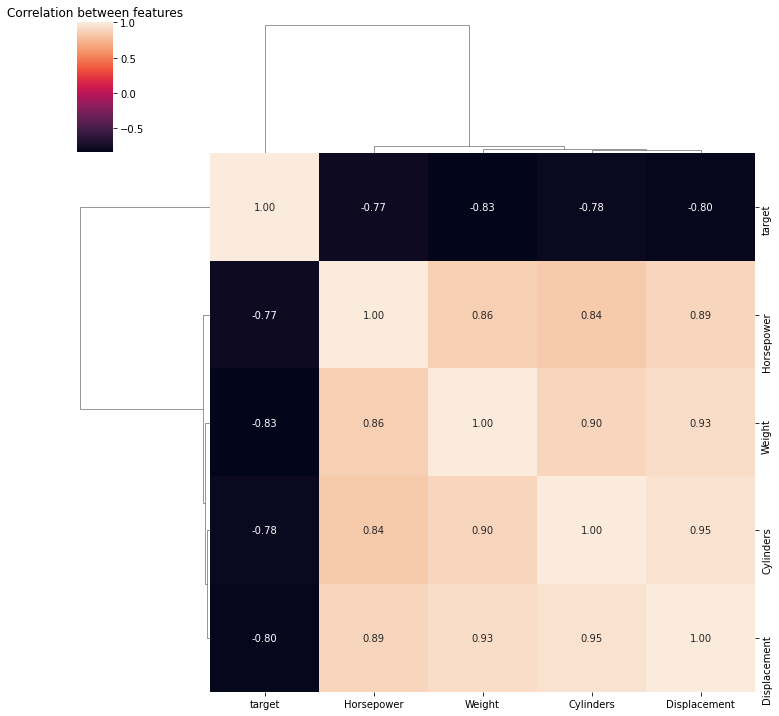

In [ ]:
sns.clustermap(data[corr_features].corr(), annot= True, fmt=".2f")
plt.title("Correlation between features")
plt.show()

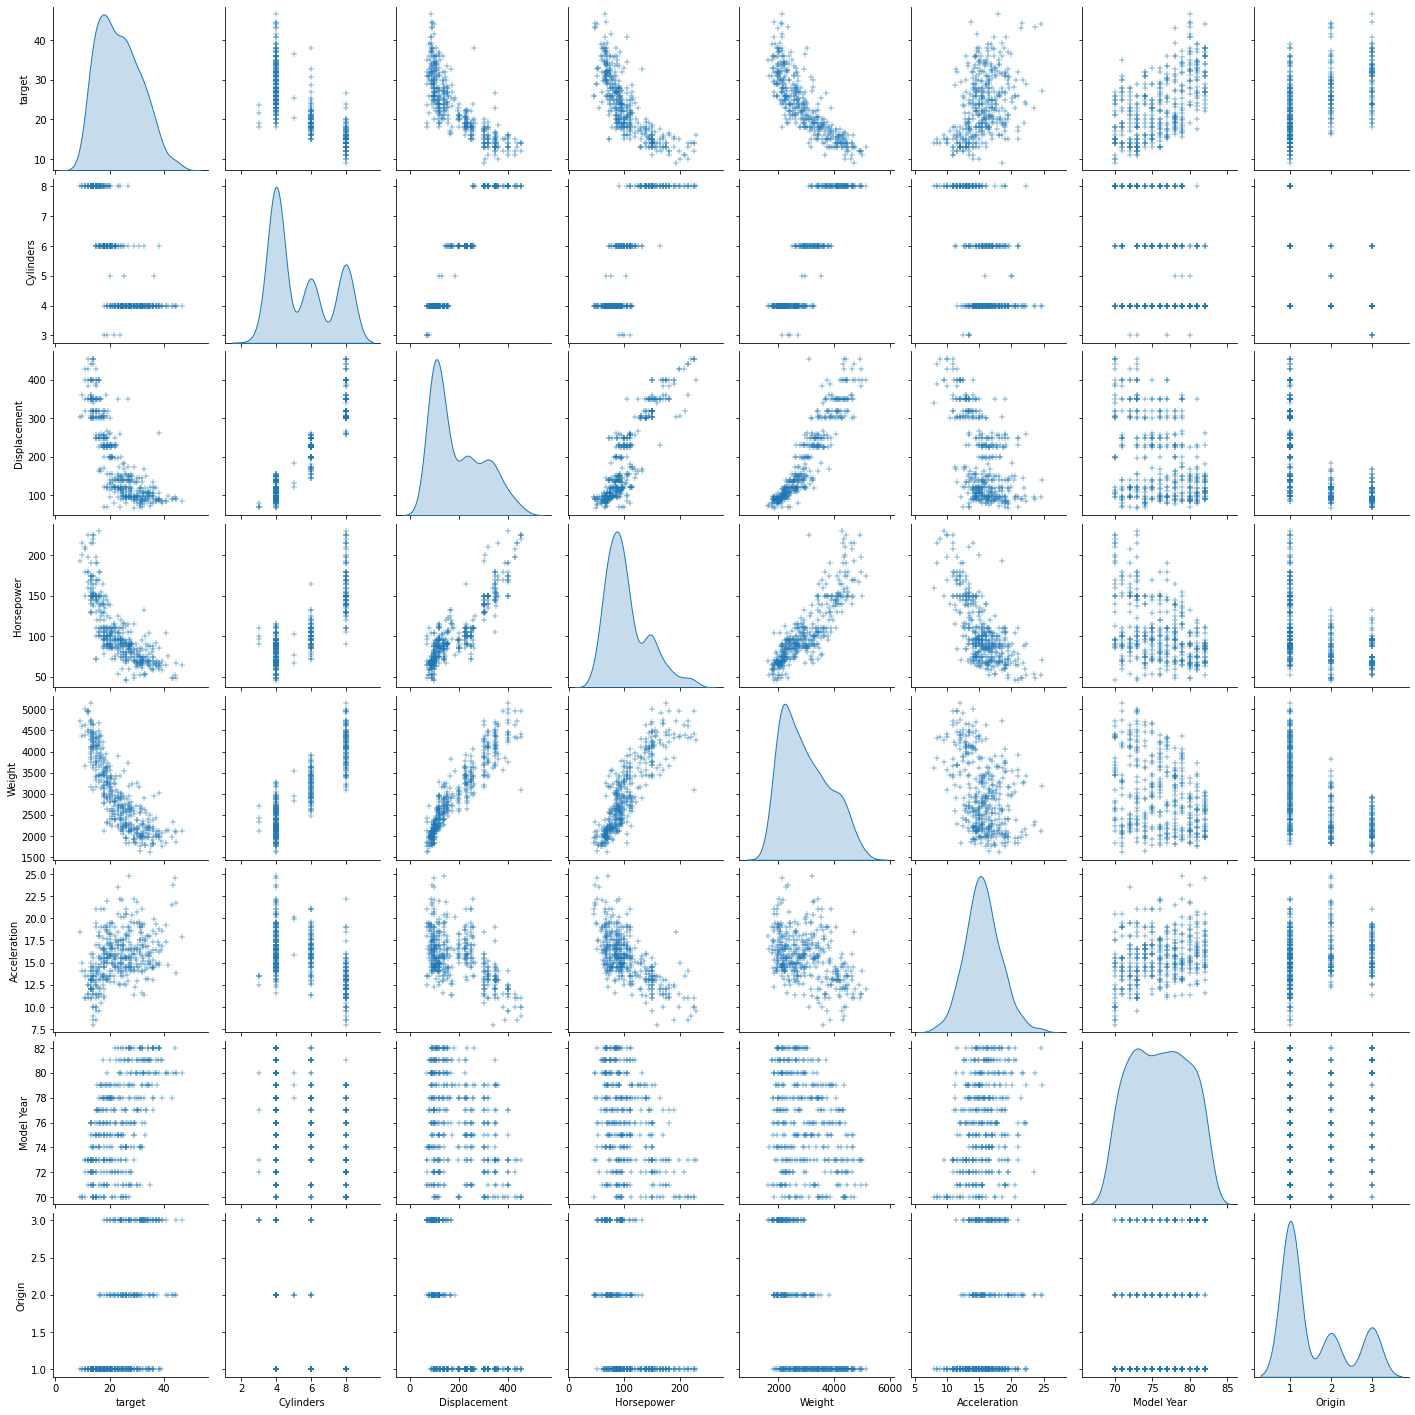

In [ ]:
#histogram gibi kde
sns.pairplot(data,diag_kind="kde", markers="+")
plt.show()

4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64


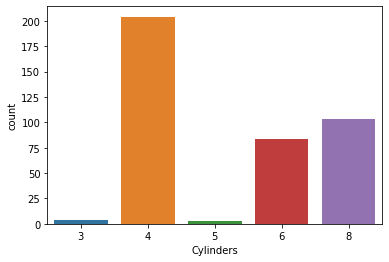

In [ ]:
plt.figure()
sns.countplot(data["Cylinders"])
print(data["Cylinders"].value_counts())

1    249
3     79
2     70
Name: Origin, dtype: int64


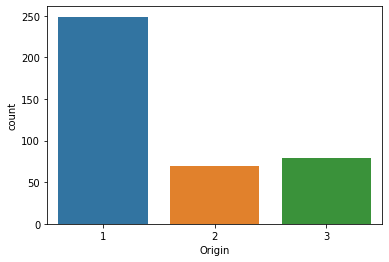

In [ ]:
plt.figure()
sns.countplot(data["Origin"])
print(data["Origin"].value_counts())
#amerika 1, avrupa 2, japonya 3 originli araç

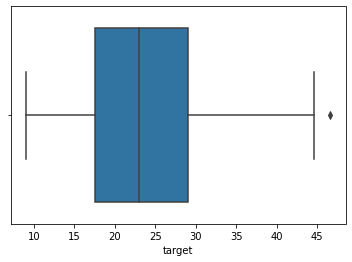

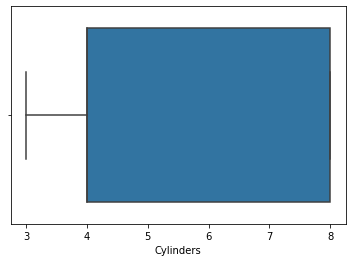

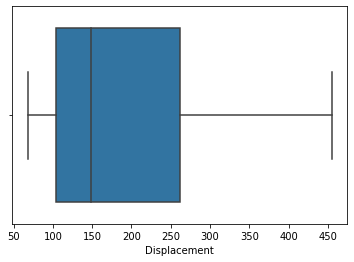

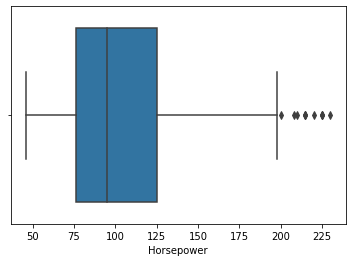

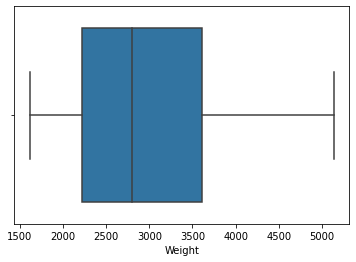

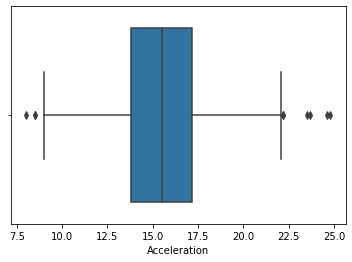

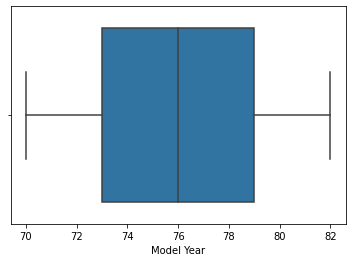

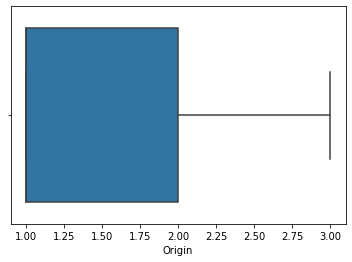

In [ ]:
#box plot, hp ve acc outlier
for c in data.columns:
  plt.figure()
  sns.boxplot(x=c, data=data, orient="v")

In [ ]:
thr = 2
desc = data.describe()
df = pd.DataFrame(desc)
horsepower_desc =df.iloc[:,3]
horsepower_desc

count    398.000000
mean     104.469388
std       38.199187
min       46.000000
25%       76.000000
50%       95.000000
75%      125.000000
max      230.000000
Name: Horsepower, dtype: float64

In [ ]:
q3_hp = horsepower_desc[6]
q3_hp

125.0

In [ ]:
q1_hp = horsepower_desc[4]
q1_hp

76.0

In [ ]:
IQR_hp =q3_hp - q1_hp

In [ ]:
top_limit_hp = q3_hp + thr*IQR_hp
top_limit_hp

223.0

In [ ]:
bottom_limit_hp = q1_hp - thr*IQR_hp
bottom_limit_hp

-22.0

In [ ]:
filter_hp_bottom = bottom_limit_hp < data["Horsepower"]

In [ ]:
filter_hp_top = data["Horsepower"] < top_limit_hp

In [ ]:
filter_hp = filter_hp_bottom & filter_hp_top

In [ ]:
data = data[filter_hp]
data

,target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [ ]:
desc = data.describe()
df = pd.DataFrame(desc)
acceleration_desc =df.iloc[:,5]
acceleration_desc

count    394.000000
mean      15.623350
std        2.715625
min        8.000000
25%       14.000000
50%       15.500000
75%       17.200000
max       24.800000
Name: Acceleration, dtype: float64

In [ ]:
q3_acc = acceleration_desc[6]
q1_acc = acceleration_desc[4]
IQR_acc =q3_acc - q1_acc

In [ ]:
top_limit_acc = q3_acc + thr*IQR_acc
bottom_limit_acc = q1_acc - thr*IQR_acc

In [ ]:
filter_acc_bottom = bottom_limit_acc < data["Acceleration"]

In [ ]:
filter_acc_top = data["Acceleration"] < top_limit_acc

In [ ]:
filter_acc = filter_acc_bottom & filter_acc_top

In [ ]:
data = data[filter_acc]
data 
#datayı bozabilecek outlierlardan kurtulduk

,target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950.0,17.3,82,1
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


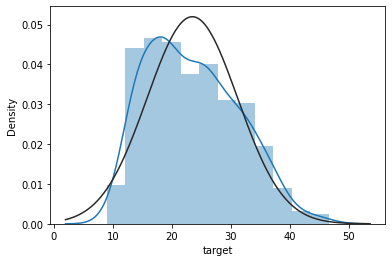

In [ ]:
#skewness
#target dependent variable
sns.distplot(data.target, fit=norm) #pozitif skewness kuyruk sagda

In [ ]:
(mu, sigma) = norm.fit(data["target"]) #mu mean, sigma standsapma
print("mu: {}, sigma = {}".format(mu, sigma))

mu: 23.499232736572893, sigma = 7.678599778082707


<function matplotlib.pyplot.show>

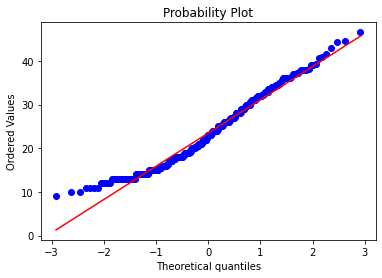

In [ ]:
#qq plot
plt.figure()
stats.probplot(data["target"], plot=plt)
plt.show

In [ ]:
data["target"] = np.log1p(data["target"]) #skewness azaltmak için log transform

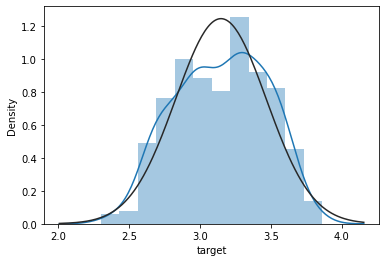

In [ ]:
plt.figure()
sns.distplot(data.target, fit = norm)

In [ ]:
(mu, sigma) = norm.fit(data["target"]) 
print("mu: {}, sigma = {}".format(mu, sigma))

mu: 3.148549778053243, sigma = 0.3198679276869635


<function matplotlib.pyplot.show>

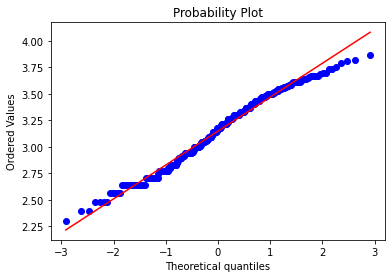

In [ ]:
#qq plot
plt.figure()
stats.probplot(data["target"], plot=plt)
plt.show

In [ ]:
#skewness
#feature : independent variables
skewed_feats = data.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feats, columns = ["skewed"])
skewness

,skewed
Horsepower,1.002620
Origin,0.915147
Displacement,0.692506
Cylinders,0.539419
Weight,0.530167
Acceleration,0.144566
Model Year,0.010762
target,-0.134213


In [ ]:
#one hot encoding
data["Cylinders"] = data["Cylinders"].astype(str)
data["Origin"] = data["Origin"].astype(str)
data = pd.get_dummies(data)
data

,target,Displacement,Horsepower,Weight,Acceleration,Model Year,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Origin_1,Origin_2,Origin_3
0,2.944439,307.0,130.0,3504.0,12.0,70,0,0,0,0,1,1,0,0
1,2.772589,350.0,165.0,3693.0,11.5,70,0,0,0,0,1,1,0,0
2,2.944439,318.0,150.0,3436.0,11.0,70,0,0,0,0,1,1,0,0
3,2.833213,304.0,150.0,3433.0,12.0,70,0,0,0,0,1,1,0,0
4,2.890372,302.0,140.0,3449.0,10.5,70,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,3.332205,151.0,90.0,2950.0,17.3,82,0,1,0,0,0,1,0,0
393,3.332205,140.0,86.0,2790.0,15.6,82,0,1,0,0,0,1,0,0
395,3.496508,135.0,84.0,2295.0,11.6,82,0,1,0,0,0,1,0,0
396,3.367296,120.0,79.0,2625.0,18.6,82,0,1,0,0,0,1,0,0


In [ ]:
#split
x = data.drop(["target"], axis=1) #bagımsız degiskenler
y = data.target #bagımlı degisken

In [ ]:
test_size = 0.9
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = test_size, random_state = 42)

In [ ]:
#Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-1.04746929, -0.89137142, -1.26160347,  1.6460879 , -1.43327846,
         0.        ,  0.87904907, -0.23249528, -0.66666667, -0.28867513,
         0.74833148, -0.58722022, -0.3380617 ],
       [-1.08827978, -0.64994122, -1.0955266 , -0.79487895, -1.43327846,
         0.        ,  0.87904907, -0.23249528, -0.66666667, -0.28867513,
        -1.33630621,  1.70293864, -0.3380617 ],
       [-0.65296787, -0.16708082,  0.25120577,  0.22219057, -0.3318428 ,
         0.        ,  0.87904907, -0.23249528, -0.66666667, -0.28867513,
        -1.33630621,  1.70293864, -0.3380617 ],
       [ 0.43531191, -0.44874938,  0.3342442 ,  0.46628726, -0.05648388,
         0.        , -1.13759292, -0.23249528,  1.5       , -0.28867513,
         0.74833148, -0.58722022, -0.3380617 ],
       [-0.44891541, -0.32803428, -0.74827498, -1.9746796 ,  1.59566961,
         0.        ,  0.87904907, -0.23249528, -0.66666667, -0.28867513,
         0.74833148, -0.58722022, -0.3380617 ],
       [ 0.77539934,  0.315779

In [ ]:
X_test

array([[ 2.9247519 ,  3.13246525,  1.1661383 , ...,  0.74833148,
        -0.58722022, -0.3380617 ],
       [ 3.15601136,  3.33365708,  3.5470766 , ...,  0.74833148,
        -0.58722022, -0.3380617 ],
       [ 1.11548677,  0.31577958,  0.81284752, ...,  0.74833148,
        -0.58722022, -0.3380617 ],
       ...,
       [-0.65296787, -0.16708082, -0.95209659, ..., -1.33630621,
        -0.58722022,  2.95803989],
       [-1.12909027, -1.09256325, -1.02758607, ..., -1.33630621,
        -0.58722022,  2.95803989],
       [-1.12909027, -0.89137142, -1.08797766, ..., -1.33630621,
        -0.58722022,  2.95803989]])

Regression Models

Linear regression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("LR Coef: ",lr.coef_)

LR Coef:  [-1.21101235e-01 -4.55580352e-02 -5.95395327e-02 -4.81552952e-02
  9.41933520e-02  1.04083409e-17  5.14634974e-03 -2.47009505e-02
  2.37914694e-03  6.74877226e-03 -1.46285820e-02  2.22111701e-02
 -8.83751495e-03]


In [ ]:
y_predicted_dummy = lr.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test, y_predicted_dummy)
print("Linear Regression MSE: ",mse)

Linear Regression MSE:  0.01780377653103839


Ridge Regression (L2)

In [ ]:
ridge = Ridge(random_state = 42, max_iter = 1000)
alphas = np.logspace(-4,-0.5,30)

In [ ]:
tuned_parameters = [{'alpha':alphas}]
n_folds = 5

In [ ]:
clf = GridSearchCV(ridge, tuned_parameters, cv = n_folds, scoring = "neg_mean_squared_error", refit = True)


In [ ]:
clf.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, random_state=42,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e...
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

In [ ]:
print("Ridge Coef: ",clf.best_estimator_.coef_)
ridge = clf.best_estimator_
print("Ridge Best Estimator: ", ridge)

Ridge Coef:  [-0.10285747 -0.04596053 -0.06532809 -0.04703368  0.09401689  0.
  0.01082148 -0.02307721 -0.00116098  0.00097552 -0.01534303  0.02275077
 -0.0084845 ]
Ridge Best Estimator:  Ridge(alpha=0.31622776601683794, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, random_state=42, solver='auto', tol=0.001)


In [ ]:
y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(Y_test, y_predicted_dummy)
print("Ridge MSE: ",mse)

Ridge MSE:  0.01705176737178957


Text(0.5, 1.0, 'Ridge')

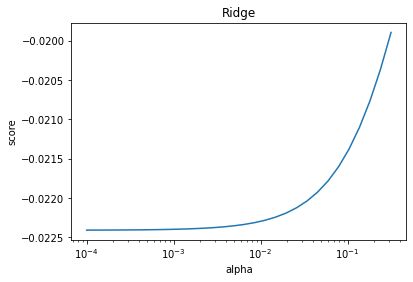

In [ ]:
plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Ridge")

Lasso Regression (L1)

In [ ]:
lasso = Lasso(random_state=42, max_iter=1000)
alphas = np.logspace(-4, -0.5, 30)

In [ ]:
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

In [ ]:
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, scoring='neg_mean_squared_error',refit=True)


In [ ]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=42,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4...
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

In [ ]:
print("Lasso Coef: ",clf.best_estimator_.coef_)
lasso = clf.best_estimator_
print("Lasso Best Estimator: ",lasso)

Lasso Coef:  [-0.11896842 -0.         -0.08103413 -0.01166124  0.07100283  0.
  0.00304688 -0.         -0.         -0.         -0.          0.
  0.        ]
Lasso Best Estimator:  Lasso(alpha=0.0196382800192977, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)


In [ ]:
y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(Y_test,y_predicted_dummy)
print("Lasso MSE: ",mse)

Lasso MSE:  0.016520105807563995


Text(0.5, 1.0, 'Lasso')

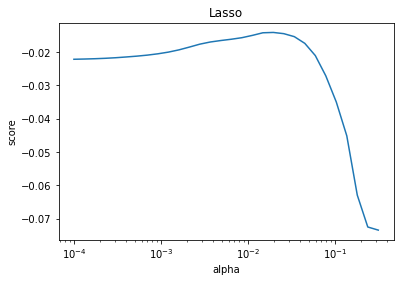

In [ ]:
plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Lasso")

ElasticNet

In [ ]:
parametersGrid = {"alpha": alphas,
                  "l1_ratio": np.arange(0.0, 1.0, 0.05)}

In [ ]:
eNet = ElasticNet(random_state=42, max_iter=1000)

In [ ]:
clf = GridSearchCV(eNet, parametersGrid, cv=n_folds, scoring='neg_mean_squared_error', refit=True)

In [ ]:
clf.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=42, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04...
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01]),
                         'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scori

In [ ]:
eNet = clf.best_estimator_

In [ ]:
print("ElasticNet Coef: ",clf.best_estimator_.coef_)
print("ElasticNet Best Estimator: ",clf.best_estimator_)

ElasticNet Coef:  [-0.06677399 -0.03329352 -0.06777475 -0.03014659  0.07455473  0.
  0.0392998  -0.00073448 -0.         -0.01057325 -0.00872815  0.01347745
  0.        ]
ElasticNet Best Estimator:  ElasticNet(alpha=0.1373823795883264, copy_X=True, fit_intercept=True,
           l1_ratio=0.05, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=42, selection='cyclic', tol=0.0001,
           warm_start=False)


In [ ]:
y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(Y_test,y_predicted_dummy)
print("ElasticNet MSE: ",mse)

ElasticNet MSE:  0.014937926405166647


Lstm

In [ ]:
data.shape

(391, 14)

In [ ]:
data = data.loc[:, ["target"]].values
data

array([[2.94443898],
       [2.77258872],
       [2.94443898],
       [2.83321334],
       [2.89037176],
       [2.77258872],
       [2.7080502 ],
       [2.7080502 ],
       [2.77258872],
       [2.77258872],
       [2.7080502 ],
       [2.77258872],
       [3.21887582],
       [3.13549422],
       [2.94443898],
       [3.09104245],
       [3.33220451],
       [3.29583687],
       [3.25809654],
       [3.21887582],
       [3.25809654],
       [3.29583687],
       [3.09104245],
       [2.39789527],
       [2.39789527],
       [2.48490665],
       [2.30258509],
       [3.33220451],
       [3.36729583],
       [3.25809654],
       [3.25809654],
       [2.99573227],
       [2.83321334],
       [2.89037176],
       [2.99573227],
       [2.94443898],
       [2.7080502 ],
       [2.7080502 ],
       [2.7080502 ],
       [2.7080502 ],
       [2.56494936],
       [2.63905733],
       [2.63905733],
       [2.94443898],
       [3.13549422],
       [2.99573227],
       [2.94443898],
       [3.178

In [ ]:
data = data.reshape(-1,1)
data = data.astype("float32")
data.shape

(391, 1)

In [ ]:
# scaling 
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [ ]:
train_size = int(len(data) * 0.50)
test_size = len(data) - train_size
train = data[0:train_size,:]
test = data[train_size:len(data),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 195, test size: 196 


In [ ]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = np.array(dataX)
trainY = np.array(dataY)

In [ ]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = np.array(dataX)
testY = np.array(dataY)  

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# model
model = Sequential()
model.add(LSTM(10, input_shape=(1, time_stemp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
184/184 [==============================] - 2s 1ms/step - loss: 0.1084
Epoch 2/50
184/184 [==============================] - 0s 1ms/step - loss: 0.0306
Epoch 3/50
184/184 [==============================] - 0s 1ms/step - loss: 0.0272
Epoch 4/50
184/184 [==============================] - 0s 1ms/step - loss: 0.0238
Epoch 5/50
184/184 [==============================] - 0s 1ms/step - loss: 0.0184
Epoch 6/50
184/184 [==============================] - 0s 1ms/step - loss: 0.0166
Epoch 7/50
184/184 [==============================] - 0s 1ms/step - loss: 0.0179
Epoch 8/50
184/184 [==============================] - 0s 1ms/step - loss: 0.0221
Epoch 9/50
184/184 [==============================] - 0s 1ms/step - loss: 0.0206
Epoch 10/50
184/184 [==============================] - 0s 2ms/step - loss: 0.0209
Epoch 11/50
184/184 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 12/50
184/184 [==============================] - 0s 1ms/step - loss: 0.0206
Epoch 13/50
184/184 [====

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.22 RMSE
Test Score: 0.23 RMSE


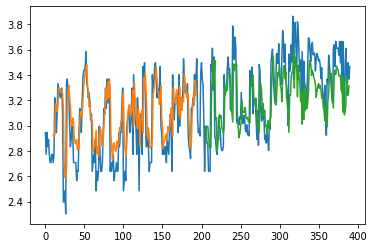

In [ ]:
# shifting train
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(data)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Averaging Models

In [ ]:
class AveragingModels():
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)  


In [ ]:
averaged_models = AveragingModels(models = (eNet, lasso))
averaged_models.fit(X_train, Y_train)

In [ ]:
y_predicted_dummy = averaged_models.predict(X_test)
mse = mean_squared_error(Y_test,y_predicted_dummy)
print("Averaged Models MSE: ",mse)

Averaged Models MSE:  0.015515313158891708
